In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
df = pd.read_csv('./kc-house-data.csv')

In [48]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [53]:
df['date'] = pd.to_numeric(df['date'], errors='coerce', downcast='integer')


## 1.2. Изучите стоимости недвижимости

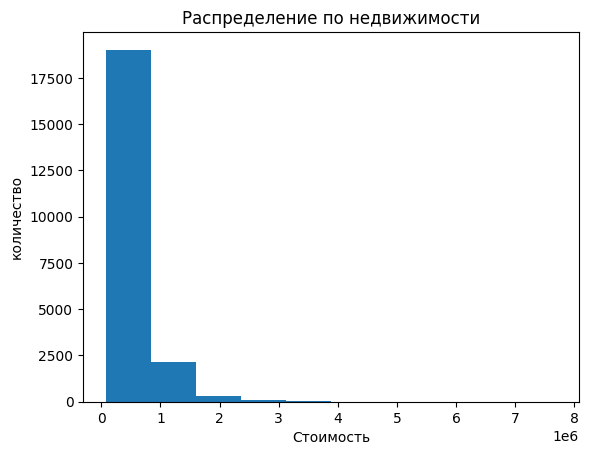

In [9]:
plt.hist(df['price'])
plt.title('Распределение по недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('количество');

## Изучите распределение квадратуры жилой

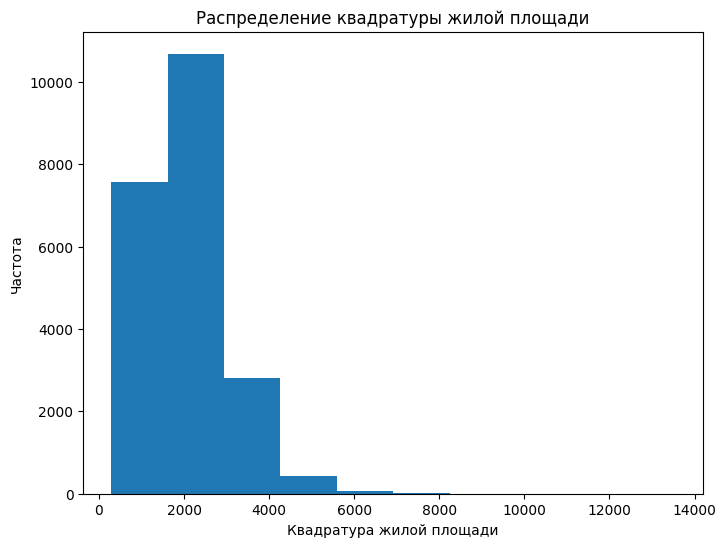

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['sqft_living'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Частота')
plt.show()

## Изучите распределение года постройки

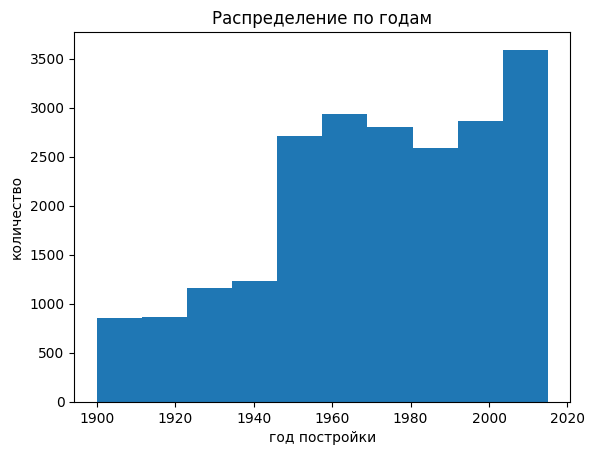

In [13]:
plt.hist(df['yr_built'])
plt.title('Распределение по годам')
plt.ylabel('количество')
plt.xlabel('год постройки');

# Задание 2

##  Изучите распределение домов от наличия вида на набережную


In [15]:
data_view=df.view.value_counts()
data_view

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [23]:
name = data_view.index
values = data_view.values

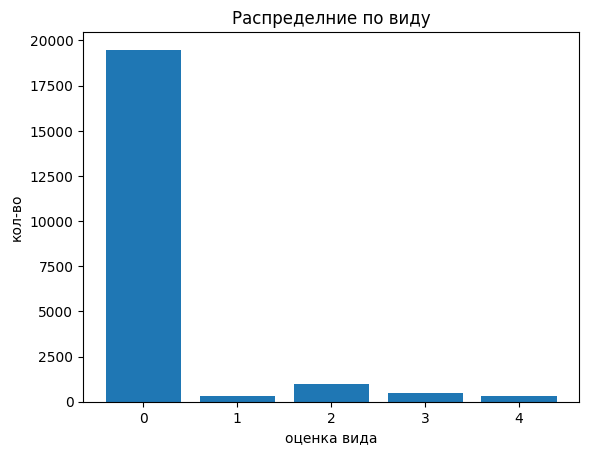

In [30]:
plt.bar(name, values)
plt.title('Распределние по виду')
plt.ylabel('кол-во')
plt.xlabel('оценка вида');

По данной гистограмме можно сказать. Что недвижимости с видом на море с разных береговых линий, больше всего домов в продаже с видом на море на второй береговой линии

## Изучите распределение этажей домов

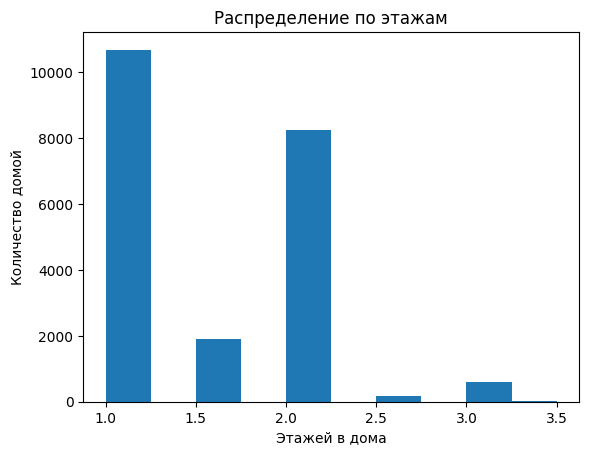

In [33]:
plt.hist(df['floors'])
plt.title('Распределение по этажам')
plt.xlabel('Этажей в дома')
plt.ylabel('Количество домой');

## Изучите распределение состояния домов

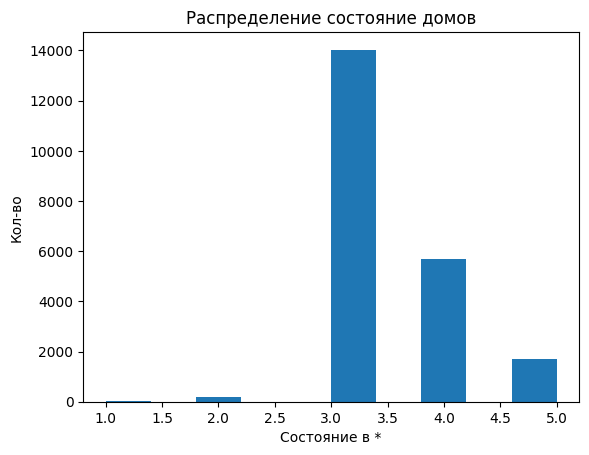

In [37]:
plt.hist(df['condition']);
plt.title('Распределение состояние домов')
plt.ylabel('Кол-во')
plt.xlabel('Состояние в *');

In [54]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3]=0
corr_matrix

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.0,NaN,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,...,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,NaN,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,...,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,NaN,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,...,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,NaN,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,...,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,NaN,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,...,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,NaN,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,NaN,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,...,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
